<a href="https://colab.research.google.com/github/dalania/Data-Science-FC01/blob/main/FC02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISE DOS MICRODADOS DO ENEM RETIRADOS DO SITE DO dados.gov.br**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**MONTAGEM DO GOOGLE DRIVE, PARA EXTRAIR DADOS DIRETO DO DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**SELECIONANDO AS COLUNAS DO DATAFRAME NO QUAL DESEJO TRABALHAR**

In [3]:
colunas = ['NU_INSCRICAO', 'TP_SEXO', 'Q001', 'Q002', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'SG_UF_RESIDENCIA']

In [4]:
df = pd.read_csv('/content/drive/MyDrive/analise-dados/MICRODADOS_ENEM_2018.csv',sep=";", encoding='ISO-8859-1', usecols=colunas)

**VISUALIZANDO OS DADOS DO DATAFRAME**

In [8]:
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,180008202043,DF,M,NaN,NaN,A,A
1,180007197856,MA,F,480.3,280.0,B,B
2,180008517434,SP,F,NaN,NaN,E,E
3,180007661228,BA,F,NaN,NaN,B,C
4,180008787987,BA,M,NaN,360.0,C,E


**LENDO OS 50 PRIMEIROS DADOS DO CSV**

In [7]:
df.loc[0:50].dropna()

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,180007197856,MA,F,480.3,280.0,B,B
5,180007239581,PB,F,538.8,580.0,C,D
7,180008090447,PI,M,733.8,680.0,A,E
8,180008257068,CE,M,459.0,340.0,D,D
9,180008202044,MT,F,525.4,740.0,C,C
12,180008948206,TO,F,642.3,640.0,E,E
13,180008787988,SP,M,622.0,840.0,E,E
16,180007766857,CE,M,514.9,580.0,C,C
17,180009379462,MG,F,530.4,580.0,C,C
18,180008257069,DF,M,503.3,360.0,E,E


**CRIANDO UM DICIONARIO NO PYTHON PARA SUBSTIUIR OS CAMPOS DO QUESTIONARIO**

In [10]:
dicionarioQ0001eQ002 = {
                        'A': 'Nunca estudou',
                        'B': 'Não completou a 4° Serie/5° ano do Ensino Fundamental',
                        'C': 'Completou a 4° Serie/5°, mas não completou a 8° serie/9° ano do Ensino Fundamental',
                        'D': 'Completou a 8° Serie/9° do Ensino Fundamental, mas não completou o Ensino Médio',
                        'E': 'Completou o Ensino Medio, mas não completou a Faculdade',
                        'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
                        'G': 'Completou a Pós-graduação',
                        'H': 'Não sei'
                        }

**ANALISE DA QUANTIDADE DE PAIS DE ALUNOS QUE COMPLETARAM OU NÃO ENSINO FUNDAMENTA, MEDIO, GRADUAÇÃO, ETC.**

In [14]:
df['NO_Q001'] = [dicionarioQ0001eQ002[resposta] for resposta in df.Q001] #Criando uma coluna no df para adicionar as respostas do dicionario


In [16]:
df['NO_Q002'] = [dicionarioQ0001eQ002[resposta] for resposta in df.Q002]

In [17]:
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
0,180008202043,DF,M,NaN,NaN,A,A,Nunca estudou,Nunca estudou
1,180007197856,MA,F,480.3,280.0,B,B,Não completou a 4° Serie/5° ano do Ensino Fund...,Não completou a 4° Serie/5° ano do Ensino Fund...
2,180008517434,SP,F,NaN,NaN,E,E,"Completou o Ensino Medio, mas não completou a ...","Completou o Ensino Medio, mas não completou a ..."
3,180007661228,BA,F,NaN,NaN,B,C,Não completou a 4° Serie/5° ano do Ensino Fund...,"Completou a 4° Serie/5°, mas não completou a 8..."
4,180008787987,BA,M,NaN,360.0,C,E,"Completou a 4° Serie/5°, mas não completou a 8...","Completou o Ensino Medio, mas não completou a ..."


**DISTRIBUIÇÃO DOS CANDIDATOS DO ENEM POR ESCOLARIDADE DO PAI**





In [ ]:

df.filter(items= ['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Medio, mas não completou a Faculdade",1384876
Não completou a 4° Serie/5° ano do Ensino Fundamental,1267055
"Completou a 4° Serie/5°, mas não completou a 8° serie/9° ano do Ensino Fundamental",794560
"Completou a 8° Serie/9° do Ensino Fundamental, mas não completou o Ensino Médio",641010
Não sei,492749
"Completou a Faculdade, mas não completou a Pós-graduação",383847
Nunca estudou,325043
Completou a Pós-graduação,224607


**DISTRIBUIÇÃO DOS CANDIDATOS DO ENEM POR ESCOLARIDADE DA MÃE**


In [18]:
df.filter(items= ['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Medio, mas não completou a Faculdade",1721772
Não completou a 4° Serie/5° ano do Ensino Fundamental,970587
"Completou a 4° Serie/5°, mas não completou a 8° serie/9° ano do Ensino Fundamental",773362
"Completou a 8° Serie/9° do Ensino Fundamental, mas não completou o Ensino Médio",735181
"Completou a Faculdade, mas não completou a Pós-graduação",520866
Completou a Pós-graduação,390981
Nunca estudou,228127
Não sei,172871


**MEDIA DA NOTA DE REDAÇÃO DE ACORDO COM A ESCOLARIDADE DA MÃE NO ESTADO DO RIO GRANDE DO NORTE**

In [19]:
df.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).where(df.SG_UF_RESIDENCIA == 'RN').groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,617.973782
"Completou a Faculdade, mas não completou a Pós-graduação",596.947092
"Completou o Ensino Medio, mas não completou a Faculdade",530.882302
"Completou a 8° Serie/9° do Ensino Fundamental, mas não completou o Ensino Médio",490.860406
"Completou a 4° Serie/5°, mas não completou a 8° serie/9° ano do Ensino Fundamental",474.004355
Não completou a 4° Serie/5° ano do Ensino Fundamental,449.897136
Não sei,442.932579
Nunca estudou,420.940649


Text(0.02, 0.65, ' A : Nunca estudou\nB : Não completou a 4° Serie/5° ano do Ensino Fundamental\nC : Completou a 4° Serie/5°, mas não completou a 8° serie/9° ano do Ensino Fundamental\nD : Completou a 8° Serie/9° do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Medio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

<Figure size 432x288 with 0 Axes>

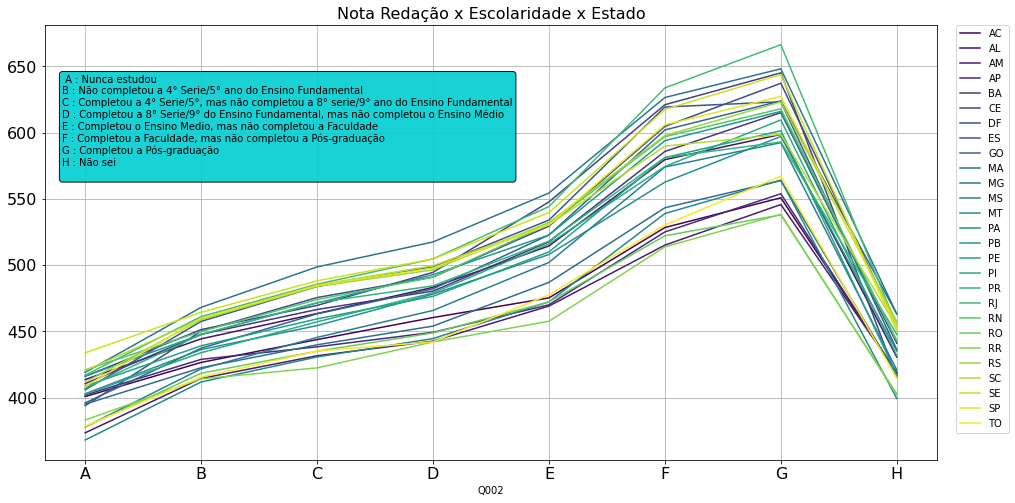

In [20]:
plt.suptitle('Nota Redação x Escolaridade x Estado')
ax = df.filter(items=['SG_UF_RESIDENCIA','Q002','NU_NOTA_REDACAO'])\
          .groupby(['Q002','SG_UF_RESIDENCIA'])\
          .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
          .unstack().plot(figsize=(16,8), colormap='viridis', fontsize=16, grid=True)
ax.set_title('Nota Redação x Escolaridade x Estado', fontsize=16)
handles , labels = ax.get_legend_handles_labels()

import re 
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.08,1), loc=0, borderaxespad=0.)


textdictQ002 = " "
for key, value in dicionarioQ0001eQ002.items():
  textdictQ002 = textdictQ002 + "{k} : {v}\n".format(k=key, v=value)
ax.text(0.02, 0.65, textdictQ002,transform=ax.transAxes, fontsize=10,
        bbox={'boxstyle':'round', 'facecolor':'darkturquoise', 'alpha': 0.9})